COVID-19 pandemic in Southeast Asia




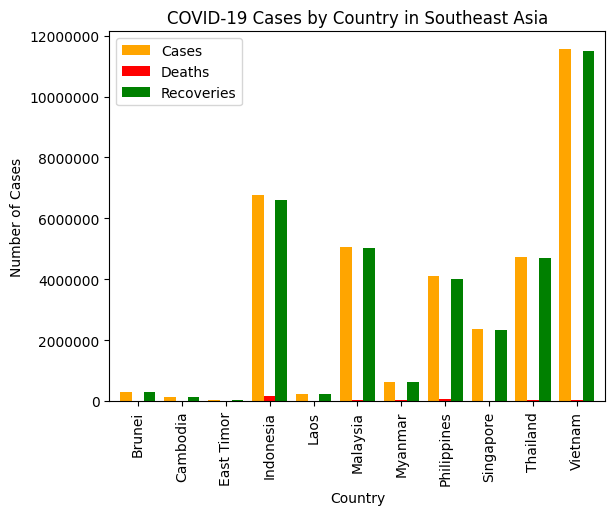

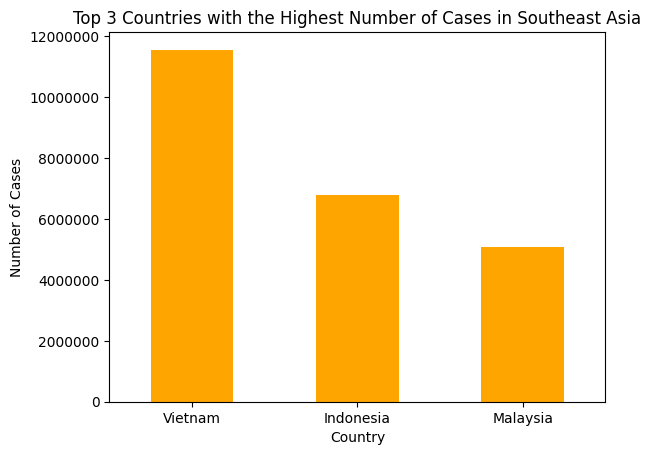

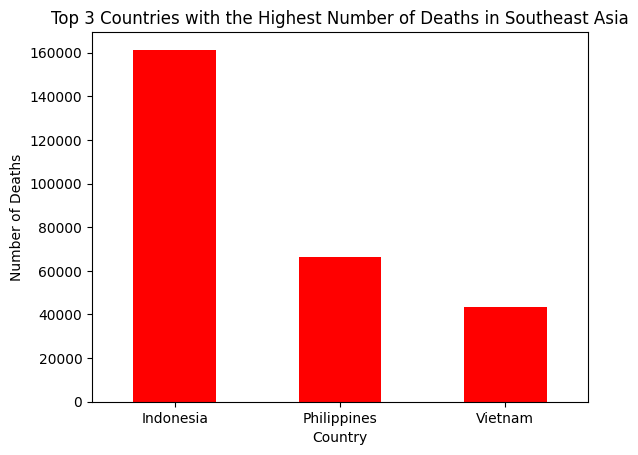


Total number of COVID 19 cases in Southeast Asia is  35910444
Total number of COVID 19 deaths in Southeast Asia is  367339
Total number of COVID 19 recoveriess in Southeast Asia is  35447220


COVID-19 cases in Southeast Asia (as of 2 May 2023)[1]



,Cases,Deaths,Recoveries
Country,,,
Brunei,285740,225,285515
Cambodia,138733,3056,135675
East Timor,23428,138,23102
Indonesia,6776984,161327,6601452
Laos,218077,758,217290
Malaysia,5071840,37020,5020529
Myanmar,634983,19492,614869
Philippines,4095468,66444,4021987
Singapore,2368597,1727,2347000


In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

url = "https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Southeast_Asia#Confirmed_cases"
data = requests.get(url).text

soup = BeautifulSoup(data,'html.parser')

main = soup.find('main',class_="mw-body")
title = main.find('h1').get_text()
print(title)
    
table = soup.find('table', class_='wikitable float sortable')
caption = table.find('caption').get_text()

df = pd.DataFrame(columns=['Country','Cases','Deaths','Recoveries'])
df_list = []
for row in table.tbody.find_all('tr'):
    # Find all data for each column
    columns = row.find_all('td')
    col_country = row.find_all('th')
    if(columns != []):
        country = col_country[0].text.strip()
        cases = int(columns[2].text.strip('&0.').replace(',', ''))
        deaths = int(columns[4].text.strip('&0.').replace(',', ''))
        recoveries = int(columns[3].text.strip('&0.').replace(',', ''))
        df_list.append(pd.DataFrame({'Country': country,'Cases':cases,'Deaths':deaths, 'Recoveries':recoveries}, index=[0]))
        
df = pd.concat(df_list, ignore_index=True)

# write data into csv file
df.to_csv('SEA_COVID.csv',index=False,columns=['Country','Cases','Deaths','Recoveries'])

print("\n")
# read data from csv file
df = pd.read_csv('SEA_COVID.csv')

# set the index to 'Country'
df.set_index('Country', inplace=True)

# create a bar chart with 3 vertical bars for each country
colors = ['orange', 'red', 'green']
ax = df.plot(kind='bar', width=0.8, color=colors)

# set the title and labels for the plot
ax.set_title('COVID-19 Cases by Country in Southeast Asia')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Cases')
# customize the x-axis tick labels
ax.tick_params(axis='x', labelrotation=90)
# customize the legend
ax.legend(fontsize=10)
# customize the y-axis format
plt.ticklabel_format(style='plain', axis='y')
# display the plot
plt.show()

print("\n")

# Sort the data by 'Cases' column in descending order and select the top 3 rows
top_cases = df.sort_values(by='Cases', ascending=False).head(3)
# Create a bar chart for the 'Cases' column of the 'top_cases' DataFrame
colors = ['orange']
ax = top_cases['Cases'].plot(kind='bar', color=colors)
# Set the title and labels for the plot
ax.set_title('Top 3 Countries with the Highest Number of Cases in Southeast Asia')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Cases')
# Customize the x-axis tick labels
ax.tick_params(axis='x', labelrotation=0)
# customize the y-axis format
plt.ticklabel_format(style='plain', axis='y')
# Display the plot
plt.show()

# Sort the data by 'Deaths' column in descending order and select the top 3 rows
top_deaths = df.sort_values(by='Deaths', ascending=False).head(3)
# Create a bar chart for the 'Deaths' column of the 'top_deaths' DataFrame
colors = ['red']
ax = top_deaths['Deaths'].plot(kind='bar',color=colors)
# Set the title and labels for the plot
ax.set_title('Top 3 Countries with the Highest Number of Deaths in Southeast Asia')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Deaths')
# Customize the x-axis tick labels
ax.tick_params(axis='x', labelrotation=0)
# customize the y-axis format
plt.ticklabel_format(style='plain', axis='y')
# Display the plot
plt.show()

#Display DataFrame
total_cases = df['Cases'].sum()
total_deaths = df['Deaths'].sum()
total_recoveries = df['Recoveries'].sum()

print("\nTotal number of COVID 19 cases in Southeast Asia is ",total_cases)
print("Total number of COVID 19 deaths in Southeast Asia is ",total_deaths)
print("Total number of COVID 19 recoveriess in Southeast Asia is ",total_recoveries)
print("\n")
print(caption)
df.head(15)